In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [3]:
df_bank = pd.read_csv('C:/Users/M.S.Chandrashekar/Desktop/Python/Machine learning/Bank portugese Dataset/bank/bank-full.csv',sep=';')
df_bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

**Portugese Bank term Deposit marketing campaign DataSet description:**
- The data is related with direct marketing campaigns of a Portuguese banking institution. 
- The different marketing campaigns were based on phone calls. 
- Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

**Features Description:**

- Features 1 to 4 is information on customer's age, job, marital status and educational qualification.
- Features 5 to 8 is information on customer's credit information - Loan default status - housing, personal loan and A/c Bal value
- Features 9 to 12 is information on customer contact in current campaign - contact mode, day of week, last contact month, duration in sec. , campaign - num of contacts during campaign.
- Duration variable to be removed(or weightage to be reduced) as the output of the call determines the outcome for that specific customer and our model should be good in predicting with customer profile rather than duration of call with specific customer.
- Features 13 to 15 is information on previous campaign: pdays- num of days of contact from previous campaign;
  previous - num of contacts performed before this campaign; poutcome- outcome of previous marketing campaign
- Target variable 'y' conatins the values of the campaign outcome.

In [4]:
df_bank.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [101]:
Banking_profilereport = ProfileReport(df_bank, title = "Banking Deposit marketing campaign")
Banking_profilereport

**Further Categorical variables need to be encoded into numerical labels before fitting model and to study the correlation between variables**

([<matplotlib.axis.XTick at 0x209e601e3d0>,
 [Text(0, 0, ''), Text(0, 0, '')])

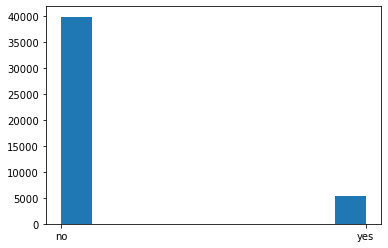

In [5]:
plt.hist(df_bank['y'])
plt.xticks(('yes','no'))

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lbl_enc = LabelEncoder()
lbl_enc.fit(df_bank['y'])
y = lbl_enc.transform(df_bank['y'])

In [8]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [9]:
df_bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [10]:
df_bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [11]:
df_bank['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [12]:
lbl_enc = LabelEncoder()
lbl_enc.fit(df_bank['marital'])
df_bank['marital_enc'] = lbl_enc.transform(df_bank['marital'])

In [13]:
df_bank['marital_enc'].value_counts()

1    27214
2    12790
0     5207
Name: marital_enc, dtype: int64

In [14]:
df_bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  \
0  unknown    5   may       261         1     -1         0  unknown  no   
1  unknown    5   may       151         1     -1         0  unknown  no   
2  unknown    5   may        76         1     -1         0  unknown  no   
3  unknown    5   may        92         1     -1         0  unknown  no   
4  unknown    5   may       198         1     -1         0  unknown  no   

   marital_enc  
0            1  
1            2  
2            1  
3            1  
4            2

In [15]:
df_bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [16]:
lbl_enc = LabelEncoder()
lbl_enc.fit(df_bank['education'])
df_bank['education_enc'] = lbl_enc.transform(df_bank['education'])

In [17]:
df_bank['education_enc'].value_counts()

1    23202
2    13301
0     6851
3     1857
Name: education_enc, dtype: int64

In [18]:
lbl_enc = LabelEncoder()
lbl_enc.fit(df_bank['default'])
df_bank['default_enc'] = lbl_enc.transform(df_bank['default'])
df_bank['default_enc'].value_counts()

0    44396
1      815
Name: default_enc, dtype: int64

In [19]:
lbl_enc = LabelEncoder()
lbl_enc.fit(df_bank['housing'])
df_bank['housing_enc'] = lbl_enc.transform(df_bank['housing'])
df_bank['housing_enc'].value_counts()

1    25130
0    20081
Name: housing_enc, dtype: int64

In [20]:
lbl_enc = LabelEncoder()
lbl_enc.fit(df_bank['loan'])
df_bank['loan_enc'] = lbl_enc.transform(df_bank['loan'])
df_bank['loan_enc'].value_counts()

0    37967
1     7244
Name: loan_enc, dtype: int64

In [21]:
df_bank['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [22]:
lbl_enc = LabelEncoder()
lbl_enc.fit(df_bank['contact'])
df_bank['contact_enc'] = lbl_enc.transform(df_bank['contact'])
df_bank['contact_enc'].value_counts()

0    29285
2    13020
1     2906
Name: contact_enc, dtype: int64

In [29]:
lbl_enc.fit(df_bank['job'])
df_bank['job_enc'] = lbl_enc.transform(df_bank['job'])
df_bank['job_enc'].value_counts()

1     9732
4     9458
9     7597
0     5171
7     4154
5     2264
6     1579
2     1487
10    1303
3     1240
8      938
11     288
Name: job_enc, dtype: int64

In [31]:
lbl_enc.fit(df_bank['poutcome'])
df_bank['poutcome_enc'] = lbl_enc.transform(df_bank['poutcome'])
df_bank['poutcome_enc'].value_counts()

3    36959
0     4901
1     1840
2     1511
Name: poutcome_enc, dtype: int64

In [33]:
lbl_enc.fit(df_bank['y'])
df_bank['target'] = lbl_enc.transform(df_bank['y'])
df_bank['target'].value_counts()

0    39922
1     5289
Name: target, dtype: int64

In [23]:
df_bank['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [34]:
df_bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ...   y  marital_enc  education_enc  default_enc  \
0  unknown    5  ...  no            1              2            0   
1  unknown    5  ...  no            2              1            0   
2  unknown    5  ...  no            1              1            0   
3  unknown    5  ...  no            1              3            0   
4  unknown    5  ...  no            2              3            0   

   housing_enc loan_enc contact_enc  job_enc  poutcome_enc  target  
0            1        0           2        4             3       0  
1            1        0           2        9             3       0  
2            1        1           2        2             3       0  
3            1        0           2        1             3       0  
4            0        0           2       11             3       0  

[5 rows x 26 columns]

In [39]:
df_bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

- Educational category with added weight to higher education

In [72]:
educ_dict = dict({'secondary':6, 'tertiary':8, 'primary':3, 'unknown': 1})

In [80]:
X_educ = np.array(df_bank['education'])

print(type(X_educ))

<class 'numpy.ndarray'>


In [95]:
df_bank['educ_ord'] = [educ_dict[i] for i in X_educ]
df_bank['educ_ord']

0        8
1        6
2        6
3        1
4        1
        ..
45206    8
45207    3
45208    6
45209    6
45210    6
Name: educ_ord, Length: 45211, dtype: int64

### Below are encoded variables ordinal and Label encoding

In [96]:
df_bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... marital_enc  education_enc  default_enc  housing_enc  \
0  unknown    5  ...           1              2            0            1   
1  unknown    5  ...           2              1            0            1   
2  unknown    5  ...           1              1            0            1   
3  unknown    5  ...           1              3            0            1   
4  unknown    5  ...           2              3            0            0   

   loan_enc contact_enc job_enc  poutcome_enc  target  educ_ord  
0         0           2       4             3       0         8  
1         0           2       9             3       0         6  
2         1           2       2             3       0         6  
3         0           2       1             3       0         1  
4         0           2      11             3       0         1  

[5 rows x 27 columns]

<AxesSubplot:>

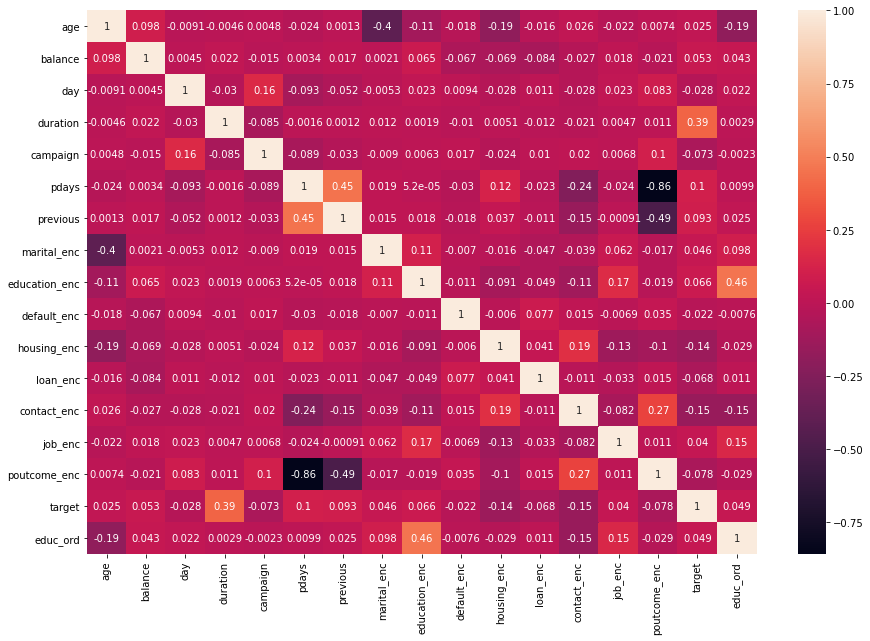

In [105]:
plt.figure(figsize=(15,10))
sns.heatmap(df_bank.corr(), annot = True)

Below inferences are observed from pearson coefficient heatmap:

*Feature 1 : 'AGE'*
    - The Mean age of the customers in the database is 40.9 yrs.
    - customer ages range from 27yrs (5th prcntle) to 59yrs (95th prcntle) with max age of 95yrs

*Feature 2:* 'poutcome, pdays, previous' are higly correlated with each other(0.4) - as each feature indicate details on previous campaign.

*Feature 3:* 'Education' and 'Job are highly correlated (0.17)

*Feature 4:* 'Housing loan' feature seem to be positively (0.16) correlated with 'pdays - previous contact weekday' and 'current campaign contacts' - suggesting that the bank focuses customers with loan for the campaign.

*target variable:* Marital status, education, previous campaign ('previous') outcome and A/c Balance are highly correlated with each other (atleast 0.05).